# Chapter 6: Activation Functions

New Skills in This Chapter:

• Understanding what is the ReLU activation function

• Adding the ReLU acitvation function to a neural network to create a nonlinear relation

• Getting to know the signmoid activation function and why it’s used in binary classifications

• Getting to know the softmax activation function and why it’s used in multi-category classifications

***
*The number of possible “on-off" patterns of neuronal firing is immense, estimated as
a staggering ten times ten one million times (ten to the millionth power). The brain
is obviously capable of an imponderably huge variety of activity; the fact that it is
often organized and functional is quite an accomplishment!*
***
The Developing Mind: Toward a Neurobiology of Interpersonal Experience

--Daniel J. Siegel, 1999

***

In [1]:
import os

os.makedirs("files/ch06", exist_ok=True)

# 6.1 Why Do We Need Activation Functions?

## 6.1.1 Construct A Neural Network

To predict the relation between $x$ and $y=sin(x)$, we'll create a neural network with four layers: an input layer with two dense neurons, two hidden layers with seven and five dense neurons in them, respectively, and an output layer with just one dense neuron. 

First, we draw a diagram to visualize the structure of the above neural network. Since the neural networks has a total of 15 neurons, and neurons in adjacent layers are fully connected, drawing all the neurons and connections can be tedious and time-consuming work. Luckily, you can borrow from online sources in the Python community. For example, Professor Colin Raffel's post below discusses how to draw a neural network with different number of layers with any number of neurons in each layer:

https://gist.github.com/craffel/2d727968c3aaebd10359

The Python code below has borrowed from Professor Colin Raffel's post. It draws the neural networks that we'll use to predict the relation between $x$ and $y=sin(x)$ (with four layers of neurons):

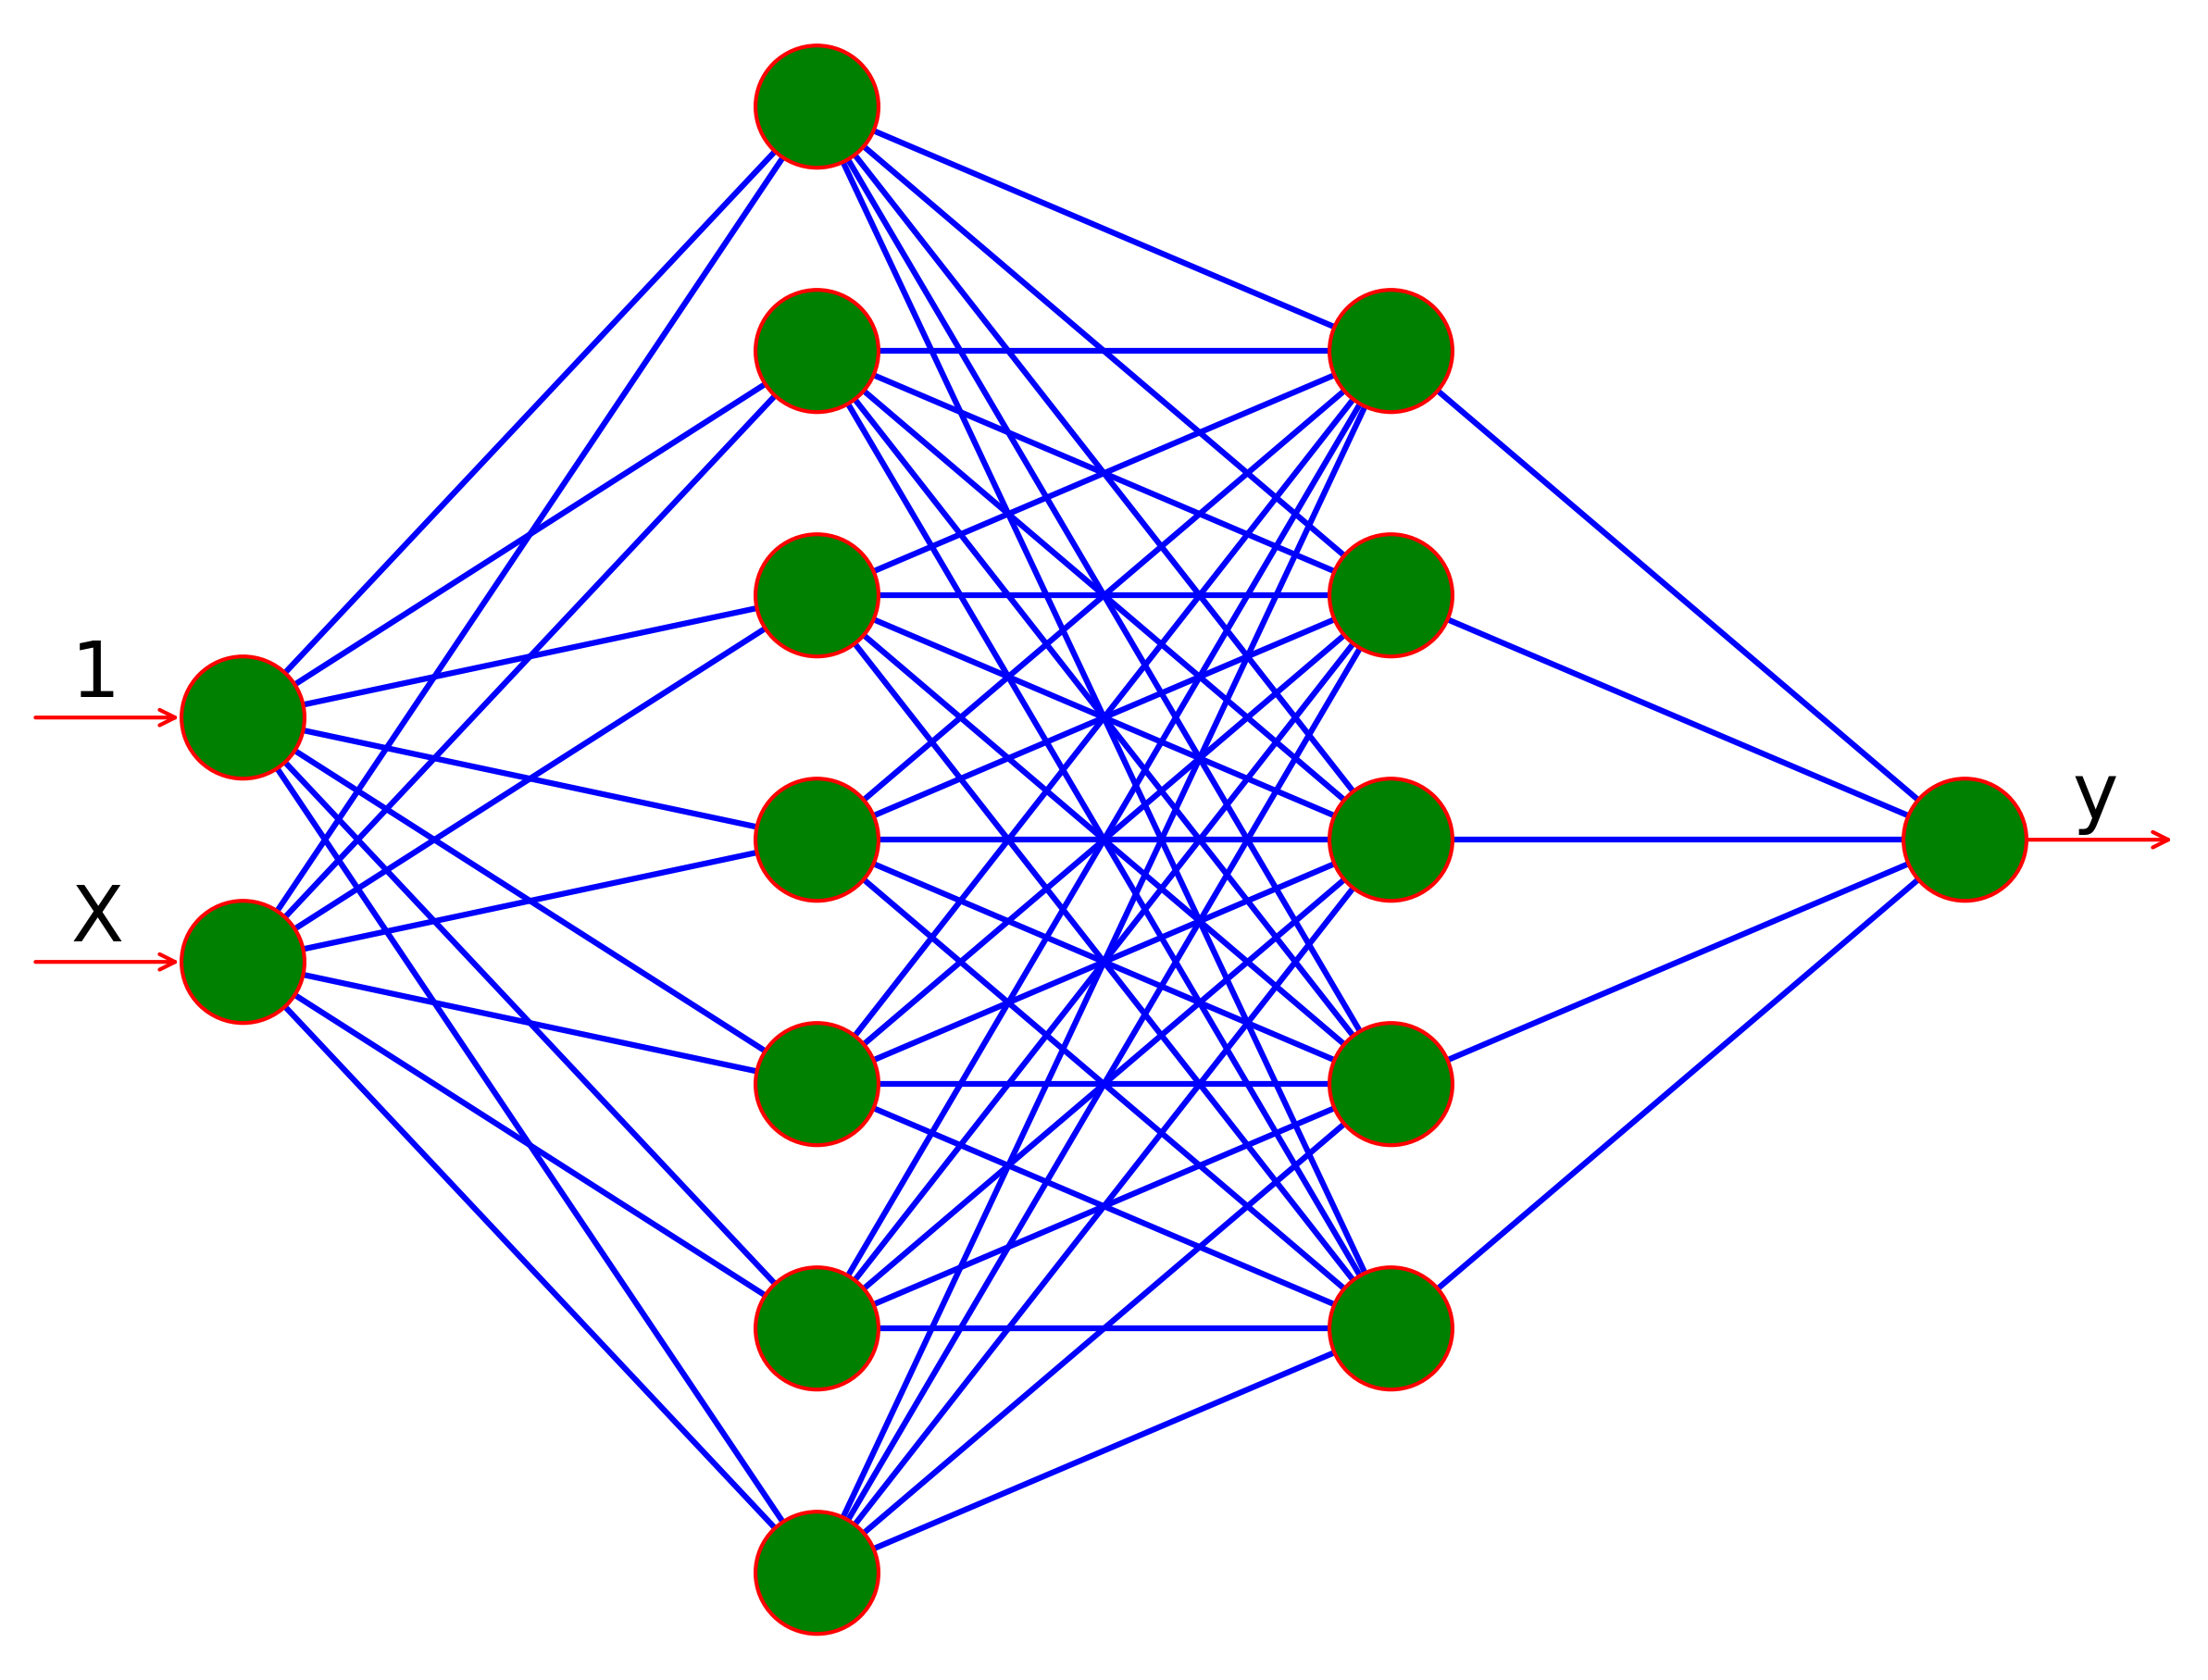

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,7.6),dpi=300)
ax=fig.add_subplot(111)
v=(0.9-0.1)/7
h=(0.9-0.1)/(4-1)
# iterate through layers            
for n, s in enumerate([2,7,5,1]):
    t=v*(s-1)/2+0.5
    # Draw neurons
    for m in range(s):
        c=plt.Circle((0.1+n*h,t-m*v),v/4,
                     color='g',ec='r',zorder=4)
        ax.add_artist(c)
    # add input lines
    if n==0:
        for m in range(2):
            ax.annotate("",xy=(0.074,t-m*v),xytext=(0,t-m*v),
            arrowprops=dict(arrowstyle='->',color='r'))                    
        plt.text(x=0.02,y=t+0.01,fontsize=20,color="k",s="1")
        plt.text(x=0.02,y=t-v+0.01,fontsize=20,color="k",s="X")
    # add output lines  
    if n==3:
        plt.text(x=3*h+0.15,y=t-m*v+0.01,
                 fontsize=20,color="k",s="y")
        ax.annotate("",xy=(3*h+0.2,t),xytext=(3*h+0.1,t),
        arrowprops=dict(arrowstyle='->',color='r'))   
# draw connections
for n, (a,b) in enumerate(zip([2,7,5],[7,5,1])):
    ta=v*(a-1)/2+0.5
    tb=v*(b-1)/2+0.5
    for m in range(a):
        for o in range(b):
            line=plt.Line2D([n*h+0.1,(n+1)*h+0.1],
                            [ta-m*v,tb-o*v],c='b')
            ax.add_artist(line) 
ax.axis('off')
ax.set_ylim(0.12,0.88)
ax.set_xlim(0,1)
fig.savefig('files/ch06/dnn-sin.png')   

## 6.1.2 Learn A Nonlinear Relation Without Activation

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Dense(7,input_dim=1))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)
# Train the model using the X, y as inputs
hist = model.fit(X, y, epochs= 150, verbose=1)

Epoch 1/150
32/32 [==============================] - 0s 662us/step - loss: 0.5082
Epoch 2/150
32/32 [==============================] - 0s 641us/step - loss: 0.5047
Epoch 3/150
32/32 [==============================] - 0s 661us/step - loss: 0.5018
Epoch 4/150
32/32 [==============================] - 0s 631us/step - loss: 0.5021
Epoch 5/150
32/32 [==============================] - 0s 625us/step - loss: 0.5024
Epoch 6/150
32/32 [==============================] - 0s 613us/step - loss: 0.5013
Epoch 7/150
32/32 [==============================] - 0s 621us/step - loss: 0.5025
Epoch 8/150
32/32 [==============================] - 0s 621us/step - loss: 0.5021
Epoch 9/150
32/32 [==============================] - 0s 581us/step - loss: 0.5041
Epoch 10/150
32/32 [==============================] - 0s 623us/step - loss: 0.5017
Epoch 11/150
32/32 [==============================] - 0s 587us/step - loss: 0.5006
Epoch 12/150
32/32 [==============================] - 0s 592us/step - loss: 0.5046
Epoch 13/150


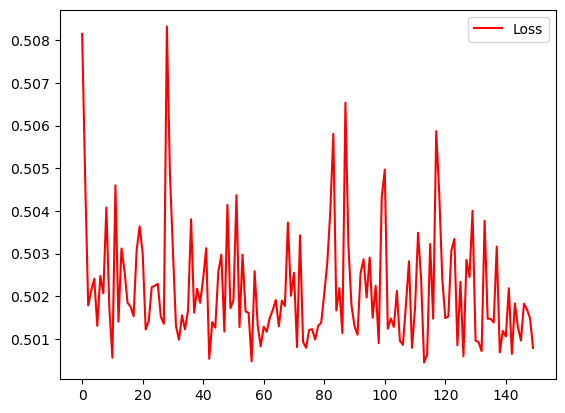

In [4]:
# View the loss through the training process
fig=plt.figure(dpi=100)
plt.plot(hist.history["loss"],label='Loss',color="r")
plt.legend()
plt.show()

Next, we'll create an out of sample testing dataset

In [5]:
# Create the testing dataset
X_test=np.linspace(-np.pi,np.pi,200)
y_test=np.sin(X_test)

In [6]:
# Make predictions on the test dataset
y_pred=model.predict(X_test)

7/7 [==============================] - 0s 653us/step


The predicted values of $y$ are saved as y_pred. 

Next, we plot both the actual $y$ and the predicted $y$ and see how good the predictions are.

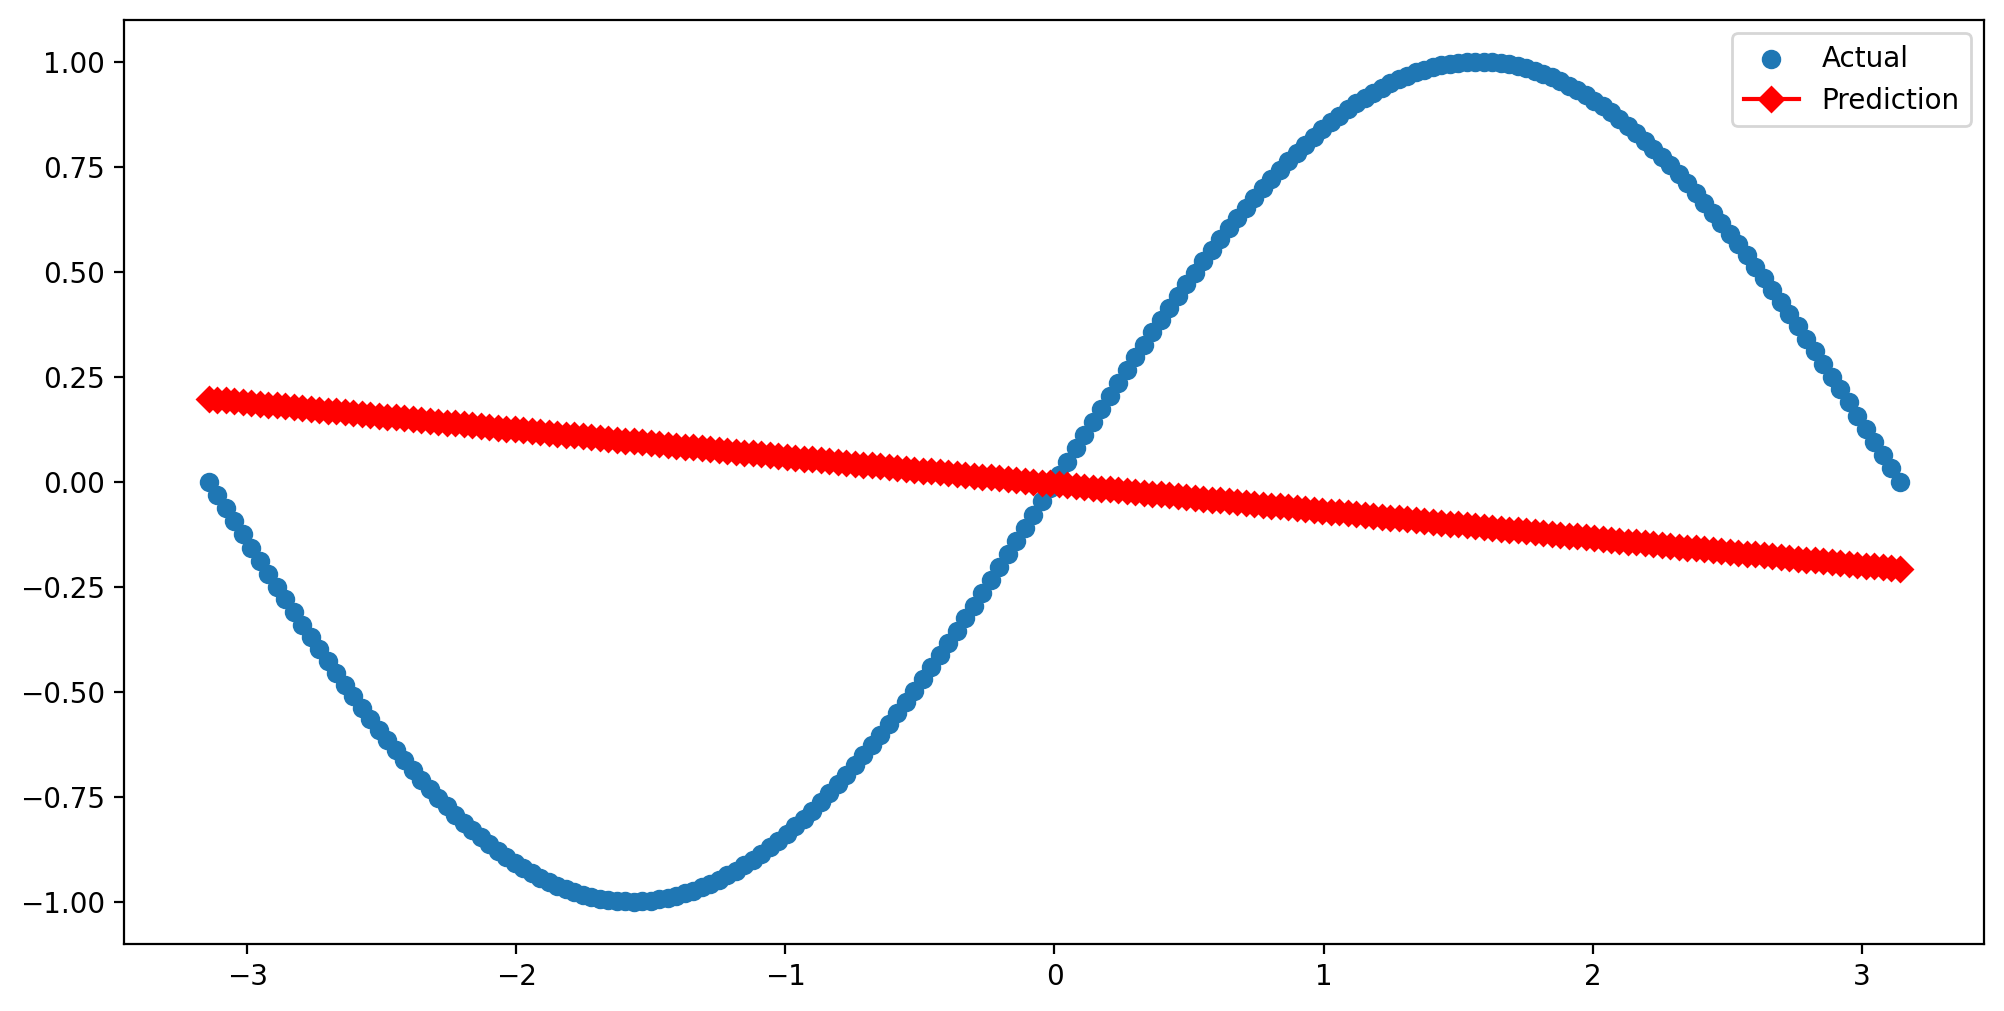

In [7]:
# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=200)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,y_pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()

As you can see above, the predictions (the red diamonds) form a straight line, while the true relation is a sine curve. 

# 6.2 The ReLU Activation Function

## 6.2.1 What is ReLU?

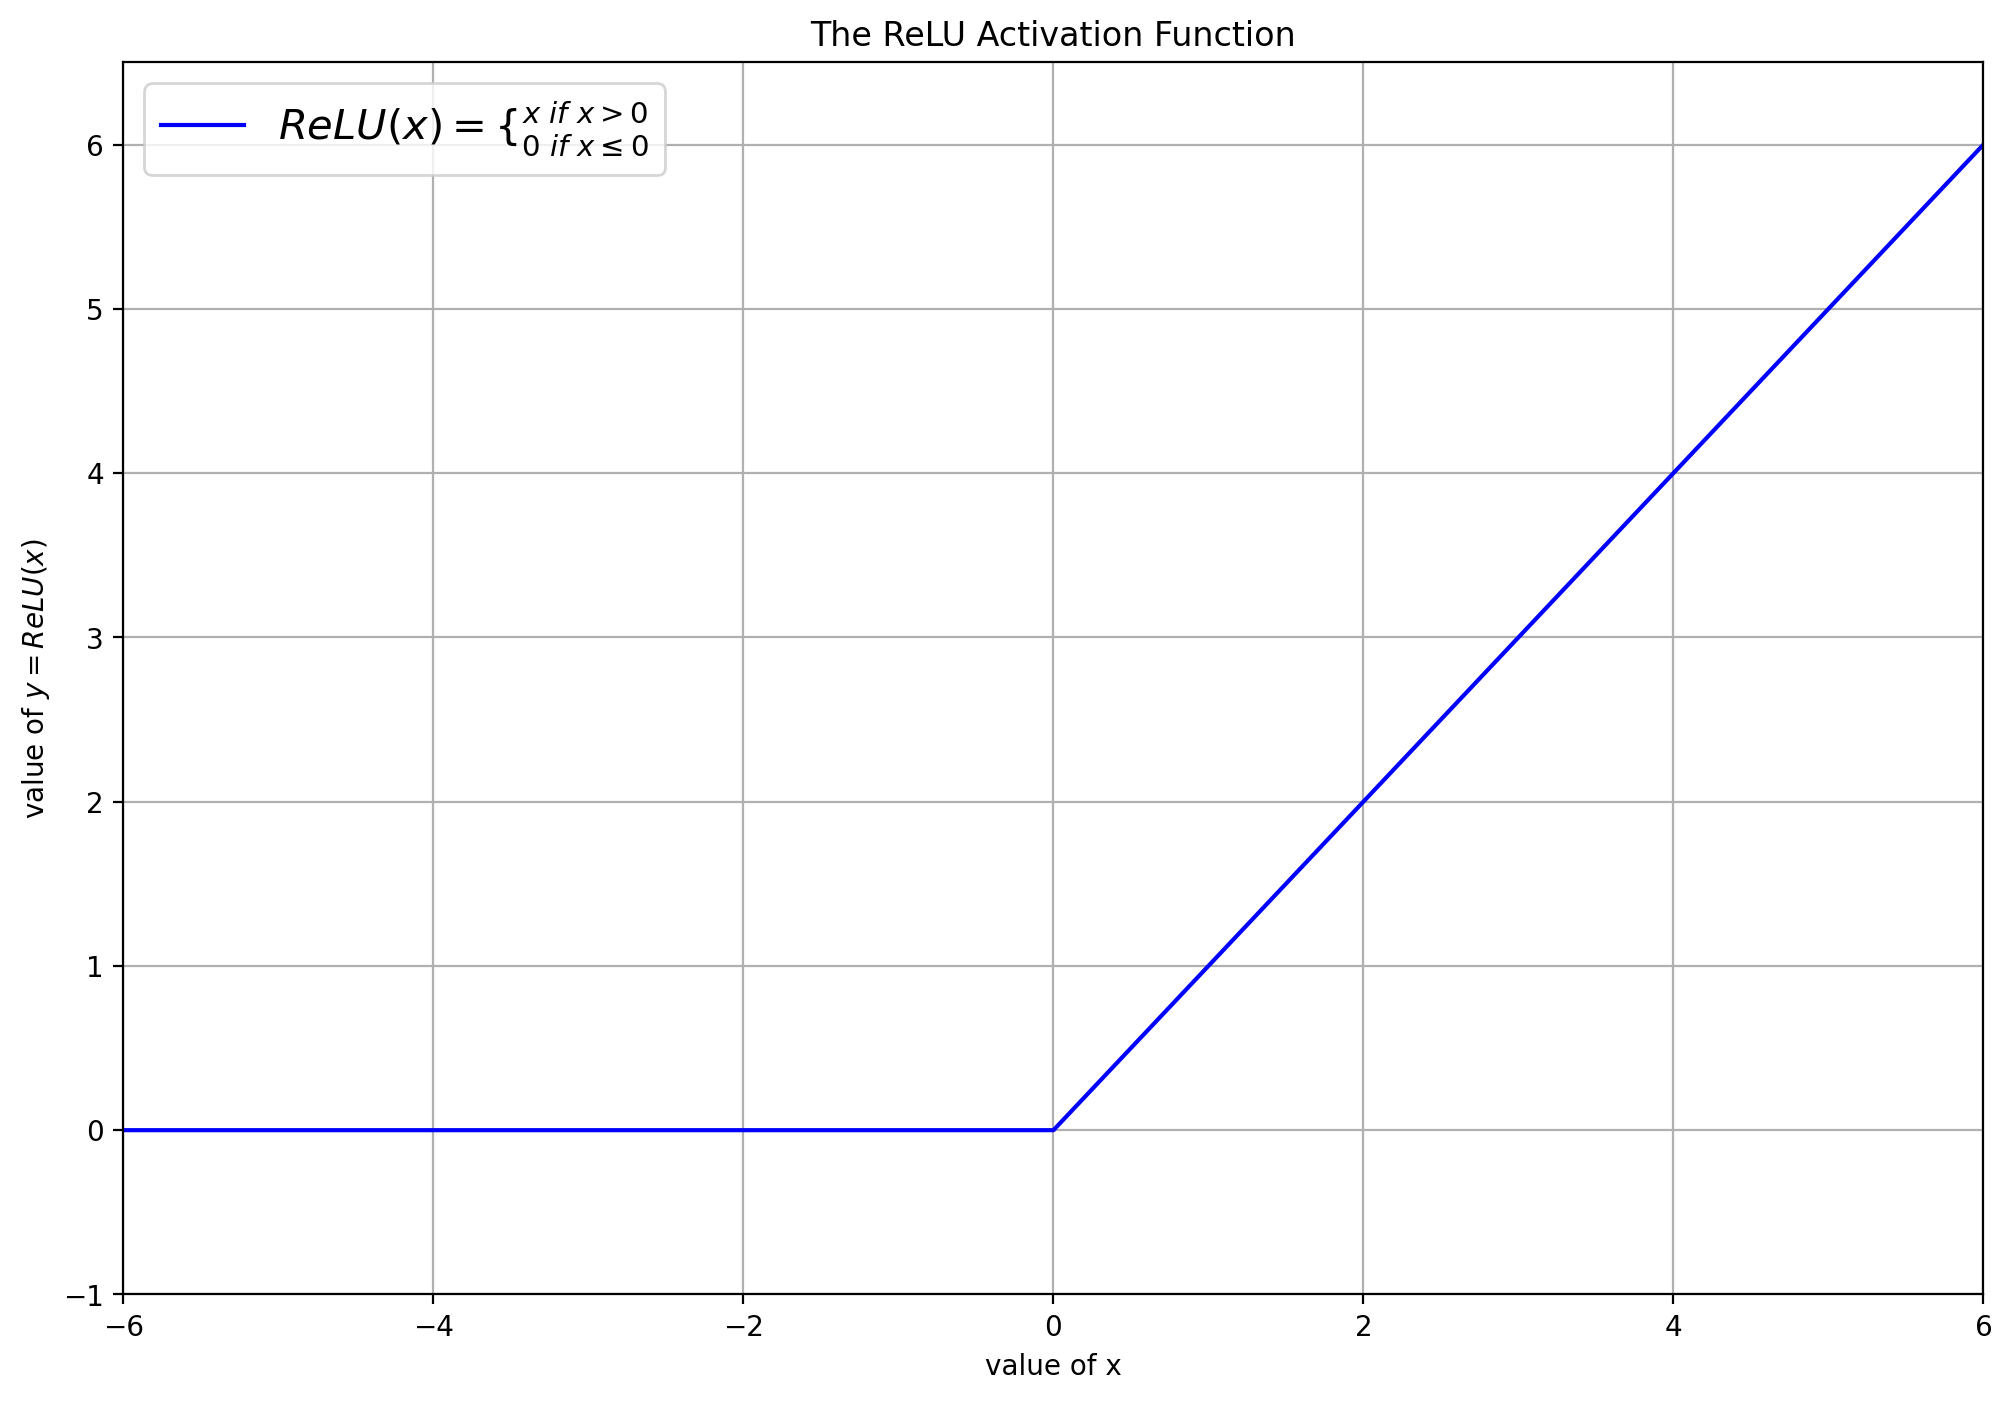

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 
xs = np.linspace(-6,6,31)

def relu(x):
    y=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>0:
            y[i]=x[i]
    return y

ys=relu(xs)  

# Plot the ReLu function
fig, ax = plt.subplots(figsize=(12,8),dpi=200)
plt.xlim(-6,6)
plt.ylim(-1,6.5)
plt.grid()
plt.plot(xs, ys, color = 'blue')  
legend='$ReLU(x)\
=\{\genfrac{}{}{0}{}{x\ if \ x>0}{0\ if \ x\leq 0}$'
plt.legend([legend],fontsize=15)    
plt.xlabel("value of x")
plt.ylabel("value of $y=ReLU(x)$")
plt.title("The ReLU Activation Function")    
plt.savefig("files/ch06/relu.png")

## 6.2.2 Animate the ReLU Function

In [9]:
# Generate the ReLU function at different (x, y)
for i in range(31):
    # add the current position of (x,y)
    x = xs[i]
    y = ys[i] 
    # Plot a pic of the relu function as background
    fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
    plt.xlim(-6,6)
    plt.ylim(-1,6.5)
    plt.grid()
    plt.plot(xs, ys, color = 'blue')    
    plt.legend([legend],fontsize=20)    
    plt.xlabel("value of x", fontsize=20)
    plt.ylabel("value of $y=ReLU(x)$", fontsize=20)
    plt.title("The ReLU Activation Function",fontsize=30)    
    plt.scatter(x,y,color='red',s=150)
    # add text to explain 
    txt=ax.annotate(
    f'value of x: {round(x,2)}\nvalue of y: {round(y,2)}', 
       xy=(x,y),xytext=(0.2,0.6),textcoords='axes fraction', 
       bbox=dict(boxstyle="round",fc="0.9"), 
       arrowprops=dict(arrowstyle='->',color='g'), 
       fontsize=20) 
    plt.savefig(f"files/ch06/relu{i}.png")
    plt.close(fig)  

Next, we combine them into an animation

In [10]:
import imageio, PIL

frames=[]
for i in range(31):
    frame=PIL.Image.open(f"files/ch06/relu{i}.png") 
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch06/relu.gif',frames,duration=200)

You can view the animation below
<img src="https://gattonweb.uky.edu/faculty/lium/ml/relu.gif"/>

## 6.2.3 Use ReLU to Model Nonlinearity
Now we add the ReLU activation function in the two hidden layers, and retrain the model.

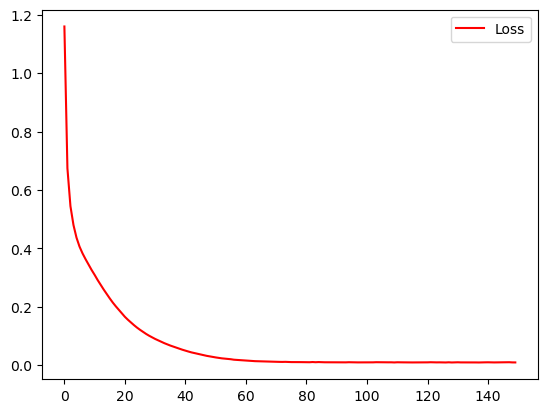

In [11]:
model = Sequential()
model.add(Dense(7, activation="relu", input_dim=1))
model.add(Dense(5, activation="relu"))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)
# Train the model using the X, y as inputs
hist = model.fit(X,y,epochs=150,verbose=0)
# View the loss through the training process
plt.plot(hist.history["loss"],label='Loss',color="r")
plt.legend()
plt.show()

We can now make out of sample predictions using the newly trained model

7/7 [==============================] - 0s 1ms/step


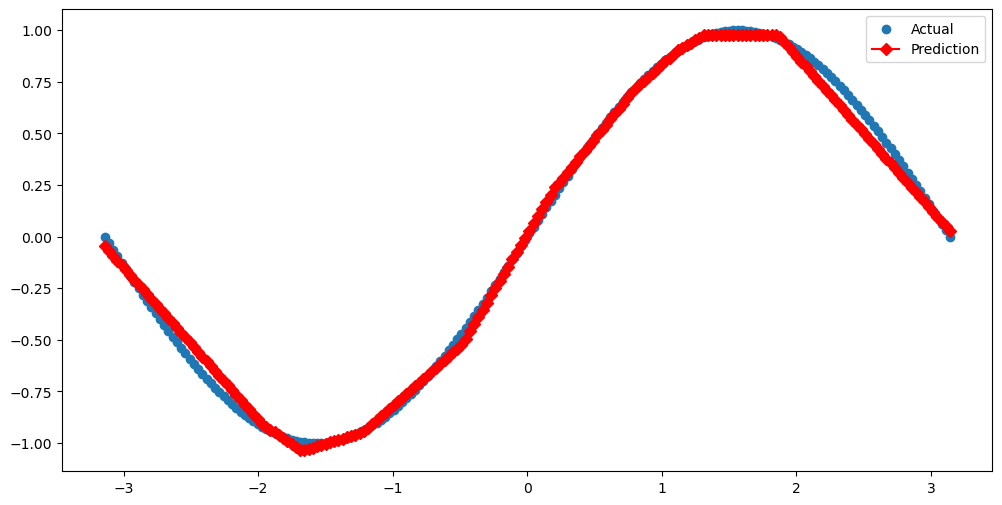

In [12]:
# Make predictions on the test set
X_test = np.linspace(-np.pi,np.pi,200)
y_test = np.sin(X_test)
pred = model.predict(X_test)
# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=100)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()

The predictions now match the true Y values pretty well. Most importantly, the shape of the prediction is now nonlinear.

# 6.3 The Sigmoid Activation Function

## 6.3.1 Plot the Sigmoid Function 

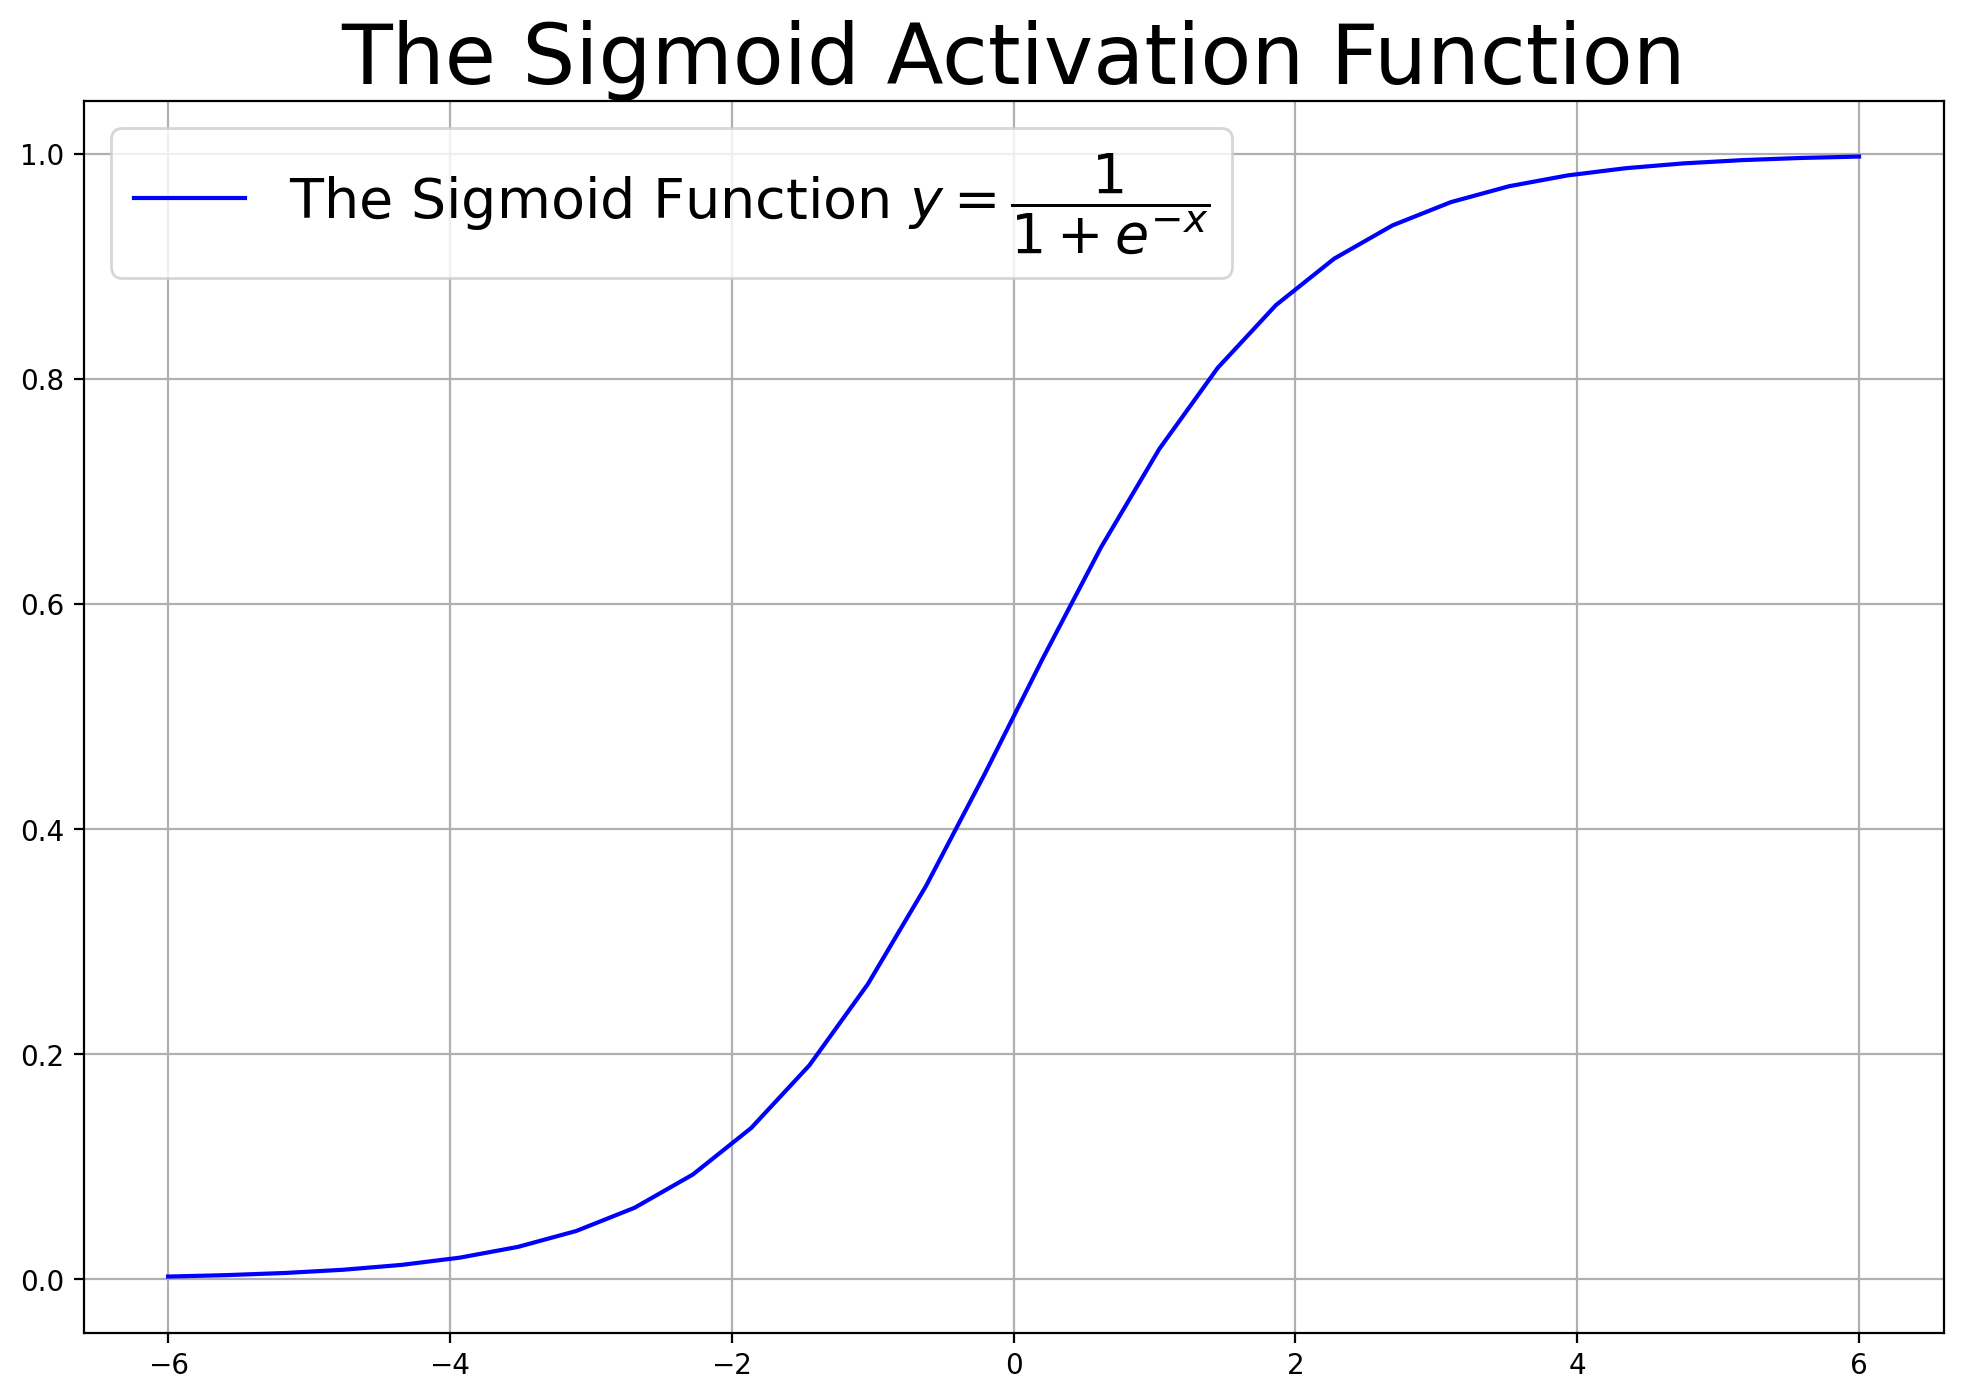

In [13]:
import numpy as np
import matplotlib.pyplot as plt

xs=np.linspace(-6,6,30)
def sigmoid(x):
    p=1/(1+np.exp(-x))
    return p
ys=sigmoid(xs)
fig,ax=plt.subplots(figsize=(12,8),dpi=200)
plt.grid()
plt.plot(xs, ys, color='blue',
label='The Sigmoid Function $y= \dfrac{1}{1 + e^{-x}}$')
plt.legend(loc="upper left",fontsize=20)    
plt.title("The Sigmoid Activation Function",fontsize=30)
plt.savefig("files/ch06/sigmoid.png")

As you can see, the value of the sigmoid function is between 0 and 1, which can be interpreted as the probability of an event. 

## 6.3.2 Animate the Sigmoid Function

In [14]:
xs = np.linspace(-6,6,31)
for i in range(31):
    # add the current position of (x,y)
    x=xs[i]
    y=sigmoid(x) 
    # Plot a pic of the sigmoid function as background
    fig,ax=plt.subplots(figsize=(12,8),dpi=200)
    plt.grid()
    plt.plot(xs,sigmoid(xs),color='blue',
    label='The Sigmoid Function $y= \dfrac{1}{1 + e^{-x}}$')
    plt.legend(loc="upper left",fontsize=20)  
    plt.xlabel("value of x",fontsize=20)
    plt.ylabel("value of $y= \dfrac{1}{1 + e^{-x}}$",
               fontsize=20)
    plt.title("The Sigmoid Activation Function",fontsize=30)    
    plt.scatter(x,y,color='red',s=150)
    # add text to explain 
    txt=ax.annotate(
    f'value of x: {round(x,5)}\nvalue of y: {round(y,5)}', 
       xy=(x,y),xytext=(0.65,0.1),textcoords='axes fraction', 
       bbox=dict(boxstyle="round",fc="0.9"), 
       arrowprops=dict(arrowstyle='->',color='g'), 
       fontsize=20)
    plt.savefig(f"files/ch06/sigmoid{i}.png")
    plt.close(fig)

In [15]:
frames=[]
for i in range(31):
    frame=PIL.Image.open(f"files/ch06/sigmoid{i}.png") 
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch06/sigmoid.gif',frames,duration=200)

If you open the file *sigmoid.gif* in your local folder, you'll see an animation as follows:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/sigmoid.gif" />

## 6.3.3 Combine Animations
Next, let's combine the two animations in one so that you can see the ReLU function and the sigmoid function side by side.

In [16]:
frames=[]
for i in range(31):
    frame1=PIL.Image.open(f"files/ch06/relu{i}.png") 
    frame1=np.asarray(frame1)
    frame2=PIL.Image.open(f"files/ch06/sigmoid{i}.png") 
    frame2=np.asarray(frame2)
    frame=np.concatenate([frame1,frame2],axis=1)  
    frames.append(np.array(frame))
imageio.mimsave('files/ch06/relusig.gif',frames,duration=200)  

You'll see an animation as follows:
<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/relusigmoid.gif" />

## 6.3.4 A Picture with Subplots of Different Stages

In [17]:
stacked=np.concatenate([frames[0],frames[10],\
            frames[20],frames[30]],axis=0) 

The list stacked now has 8 pictures in it, with 2 different functions and four different stages. 

Next, we'll use matplotlib.pyplot to create a figure with the 12 pictures as subplots, like so:

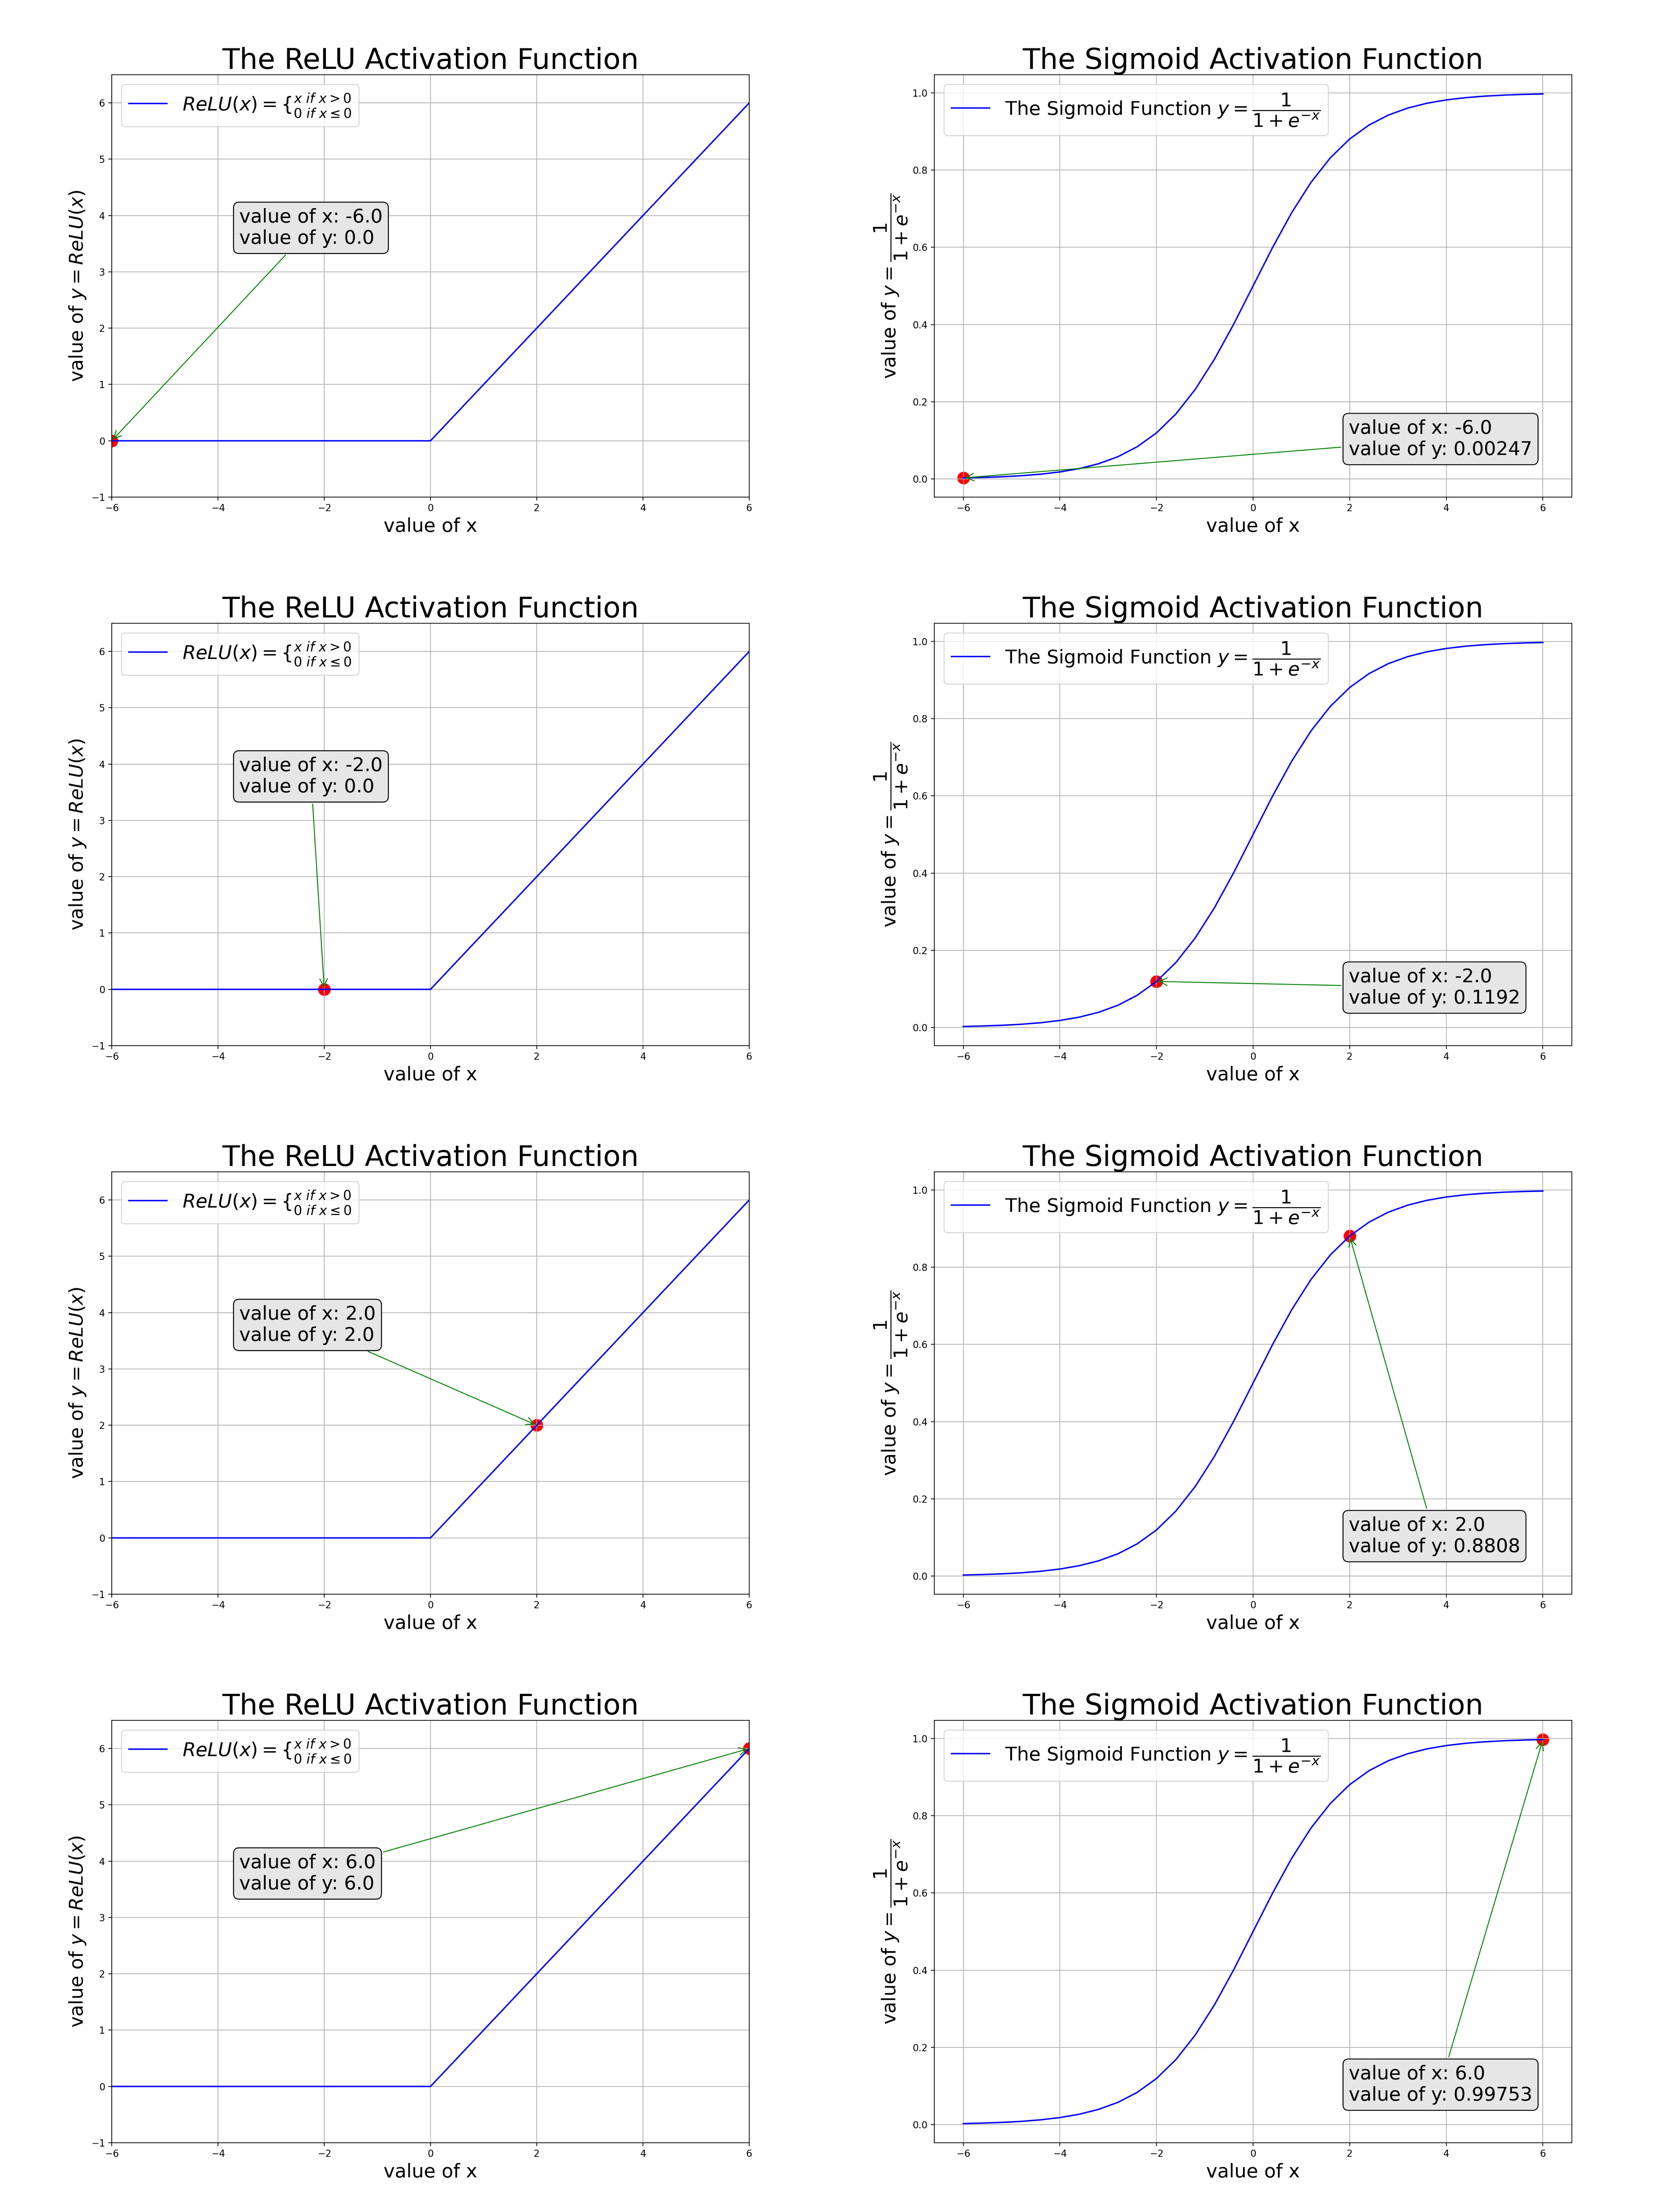

In [18]:
fig=plt.figure(dpi=300,figsize=(24,32))
plt.imshow(stacked)
plt.axis('off')
plt.show()

# 6.4 The Softmax Activation Function

## 6.4.1 What Is the Softmax Function?

In [19]:
xs = [-1.3, 7.9, -0.8, 5.1]
# Define the softmax() function
def softmax(x):
    xi=np.exp(x)
    return xi/xi.sum() 
# Converts them into four values
ys = softmax(xs)
for y in ys:
    print(0<=y<=1)

True
True
True
True


In [20]:
# The sum of the four values
print("the sum of the four values in ys is", ys.sum())

the sum of the four values in ys is 1.0


## 6.4.2 A Diagram of the Softmax Function

(-6.0, 6.0, -2.0, 2.0)

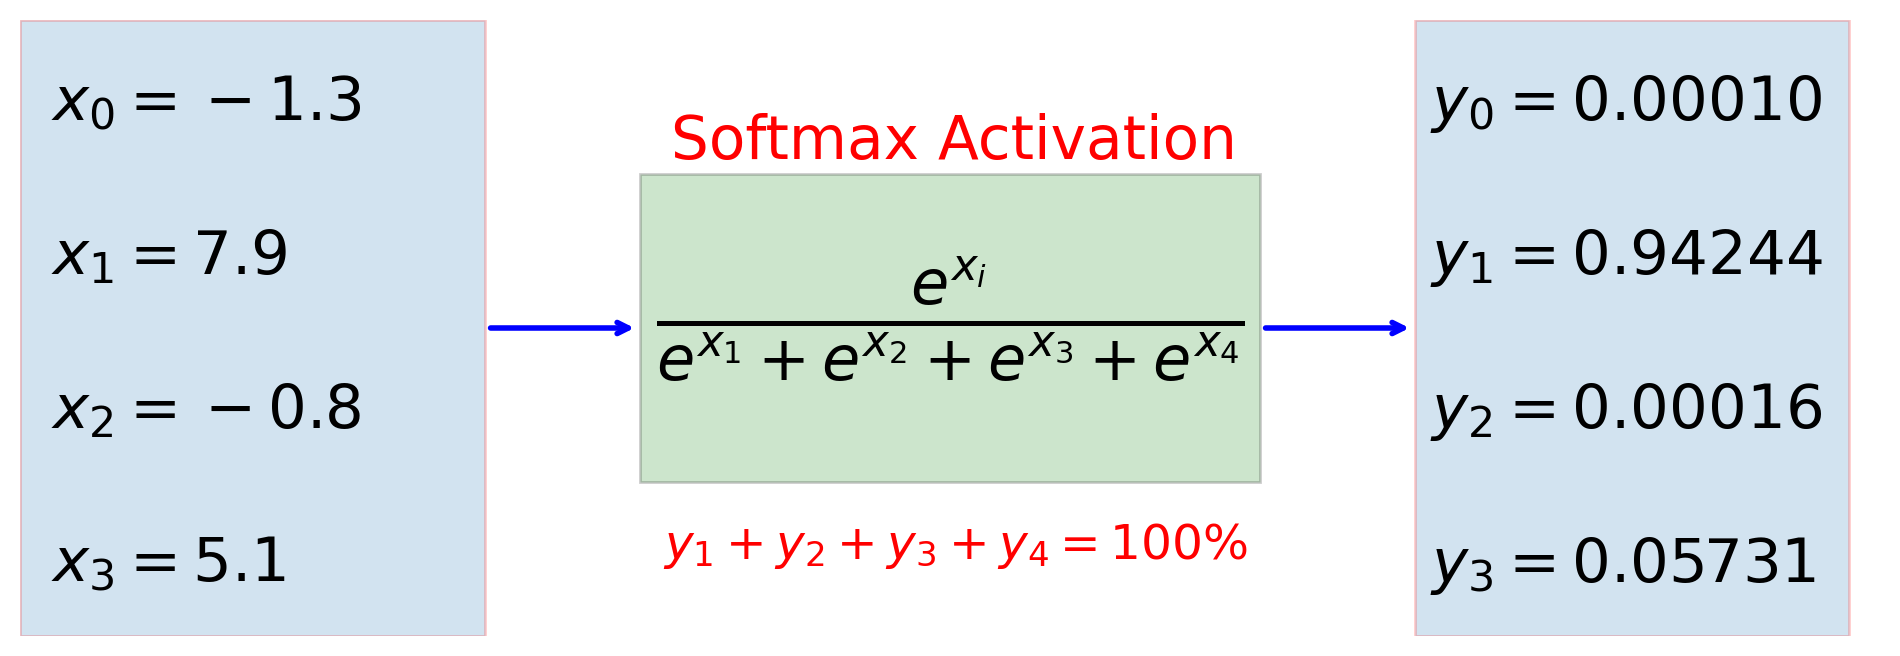

In [21]:
from matplotlib.patches import Rectangle

xs = [-1.3, 7.9, -0.8, 5.1]
# Define the softmax function
def softmax(x):
    xi=np.exp(x)
    return xi/xi.sum() 
ys = softmax(xs)
# Create a figure
fig = plt.figure(figsize=(12,4), dpi=200)
ax = fig.add_subplot(111)
# Add rectangles to the figure
ax.add_patch(Rectangle((-6,-2), 3, 4,
             edgecolor = 'r',alpha=0.2))
ax.add_patch(Rectangle((3,-2), 2.8, 4,
             edgecolor = 'r',alpha=0.2))
ax.add_patch(Rectangle((-2,-1), 4, 2,
             edgecolor = 'k',
             facecolor = 'g',
             alpha=0.2))
# Add text boxes
plt.text(-1.9, -0.1, 
         r"$\frac {e^{x_i}} {e^{x_1}+e^{x_2}+e^{x_3}+e^{x_4}} $",
         fontsize=32, color="k")
plt.text(-1.8, 1.1, r"Softmax Activation",
         fontsize=21.5, color="r")
plt.text(-1.85, -1.5, r"$y_1+y_2+y_3+y_4=100\%$",
         fontsize=17.5, color="r")
# Add x and y values
for i in range(4):
    plt.text(-5.8, 1.35-i, f"$x_{i}={xs[i]}$",
        fontsize=22, color="k")    
    plt.text(3.1, 1.35-i, f"$y_{i}={ys[i]:.5f}$",
        fontsize=22, color="k")  
ax.annotate("", xy=(-2,0), xytext = (-3,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.annotate("", xy = (3,0), xytext = (2,0), 
                   arrowprops=dict(arrowstyle = '->',
                   color = 'b', linewidth = 2))
ax.set_xlim(-6, 6)
ax.set_ylim(-2, 2)
plt.axis("off")

# 6.6 Exercises

(0.0, 1.0)

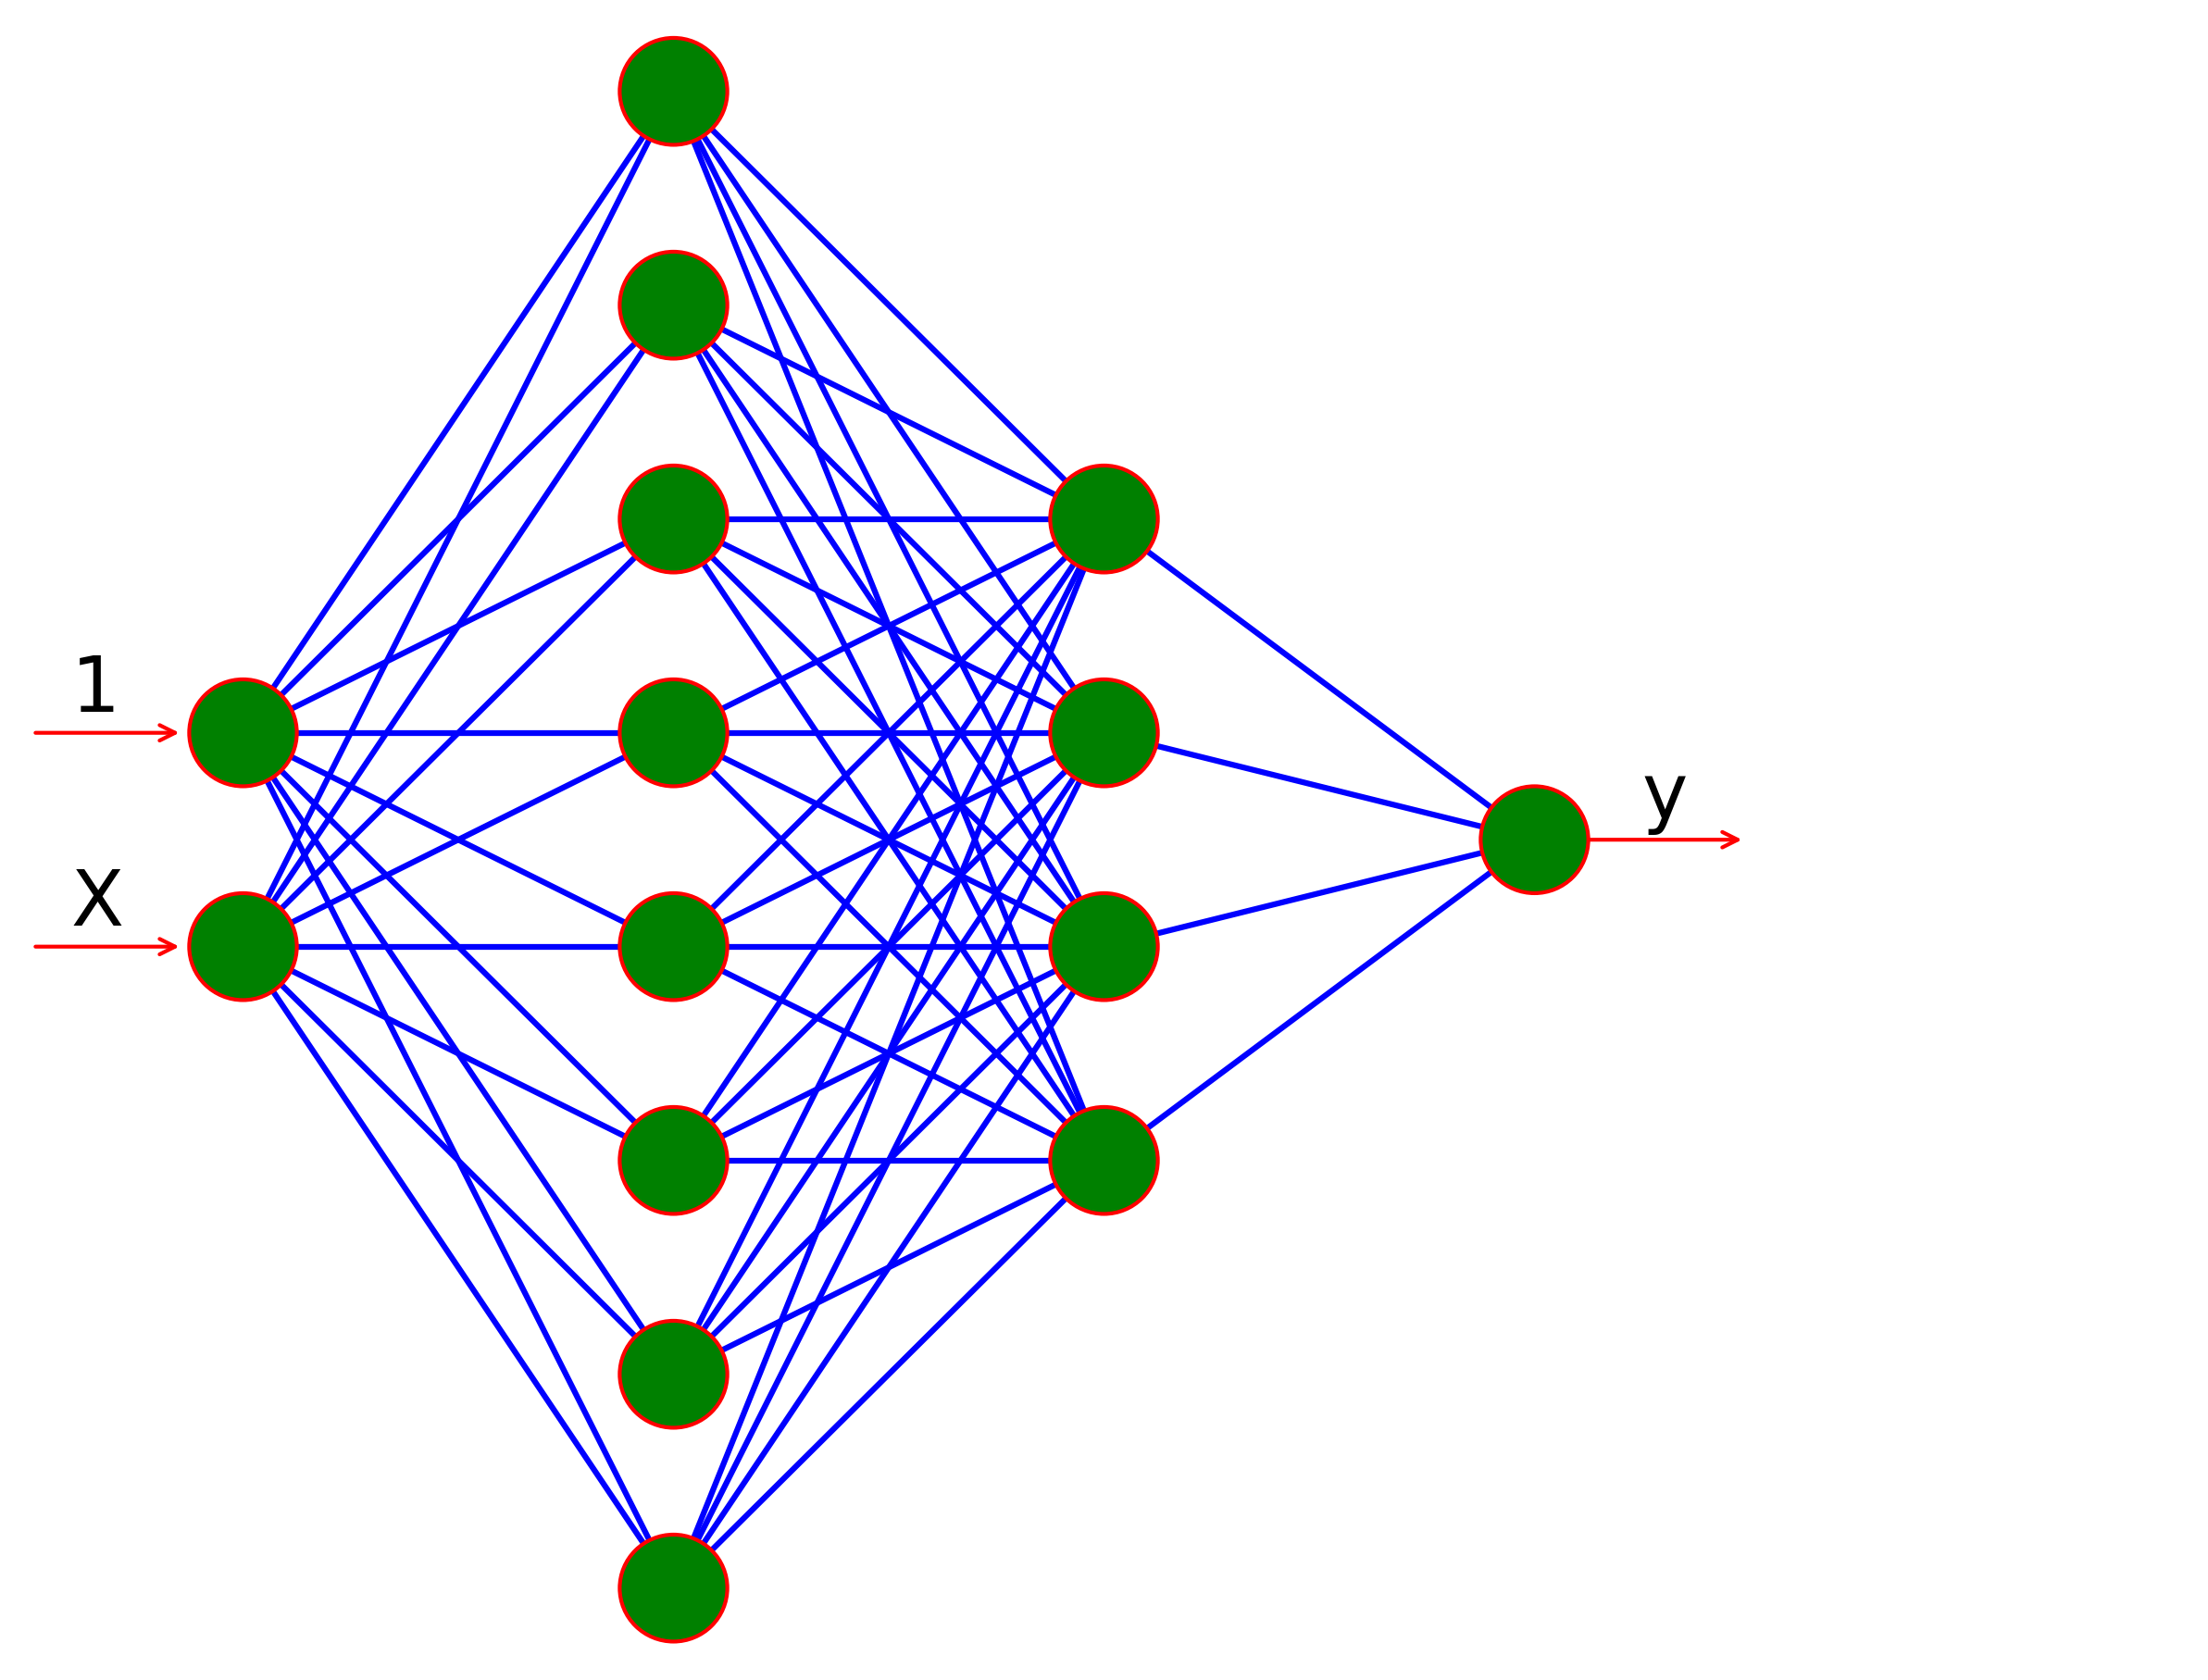

In [22]:
# answer to question 6.2
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,7.6),dpi=300)
ax=fig.add_subplot(111)
v=(0.9-0.1)/8
h=(0.9-0.1)/(5-1)
# iterate through layers            
for n, s in enumerate([2,8,4,1]):
    t=v*(s-1)/2+0.5
    # Draw neurons
    for m in range(s):
        c=plt.Circle((0.1+n*h,t-m*v),v/4,
                     color='g',ec='r',zorder=4)
        ax.add_artist(c)
    # add input lines
    if n==0:
        for m in range(2):
            ax.annotate("",xy=(0.074,t-m*v),xytext=(0,t-m*v),
            arrowprops=dict(arrowstyle='->',color='r'))                    
        plt.text(x=0.02,y=t+0.01,fontsize=20,color="k",s="1")
        plt.text(x=0.02,y=t-v+0.01,fontsize=20,color="k",s="X")
    # add output lines  
    if n==3:
        plt.text(x=3*h+0.15,y=t-m*v+0.01,
                 fontsize=20,color="k",s="y")
        ax.annotate("",xy=(3*h+0.2,t),xytext=(3*h+0.1,t),
        arrowprops=dict(arrowstyle='->',color='r'))   
# draw connections
for n, (a,b) in enumerate(zip([2,8,4],[8,4,1])):
    ta=v*(a-1)/2+0.5
    tb=v*(b-1)/2+0.5
    for m in range(a):
        for o in range(b):
            line=plt.Line2D([n*h+0.1,(n+1)*h+0.1],
                            [ta-m*v,tb-o*v],c='b')
            ax.add_artist(line) 
ax.axis('off')
ax.set_ylim(0.12,0.88)
ax.set_xlim(0,1)
#fig.savefig('files/ch06/dnn-sin.png')   

7/7 [==============================] - 0s 755us/step


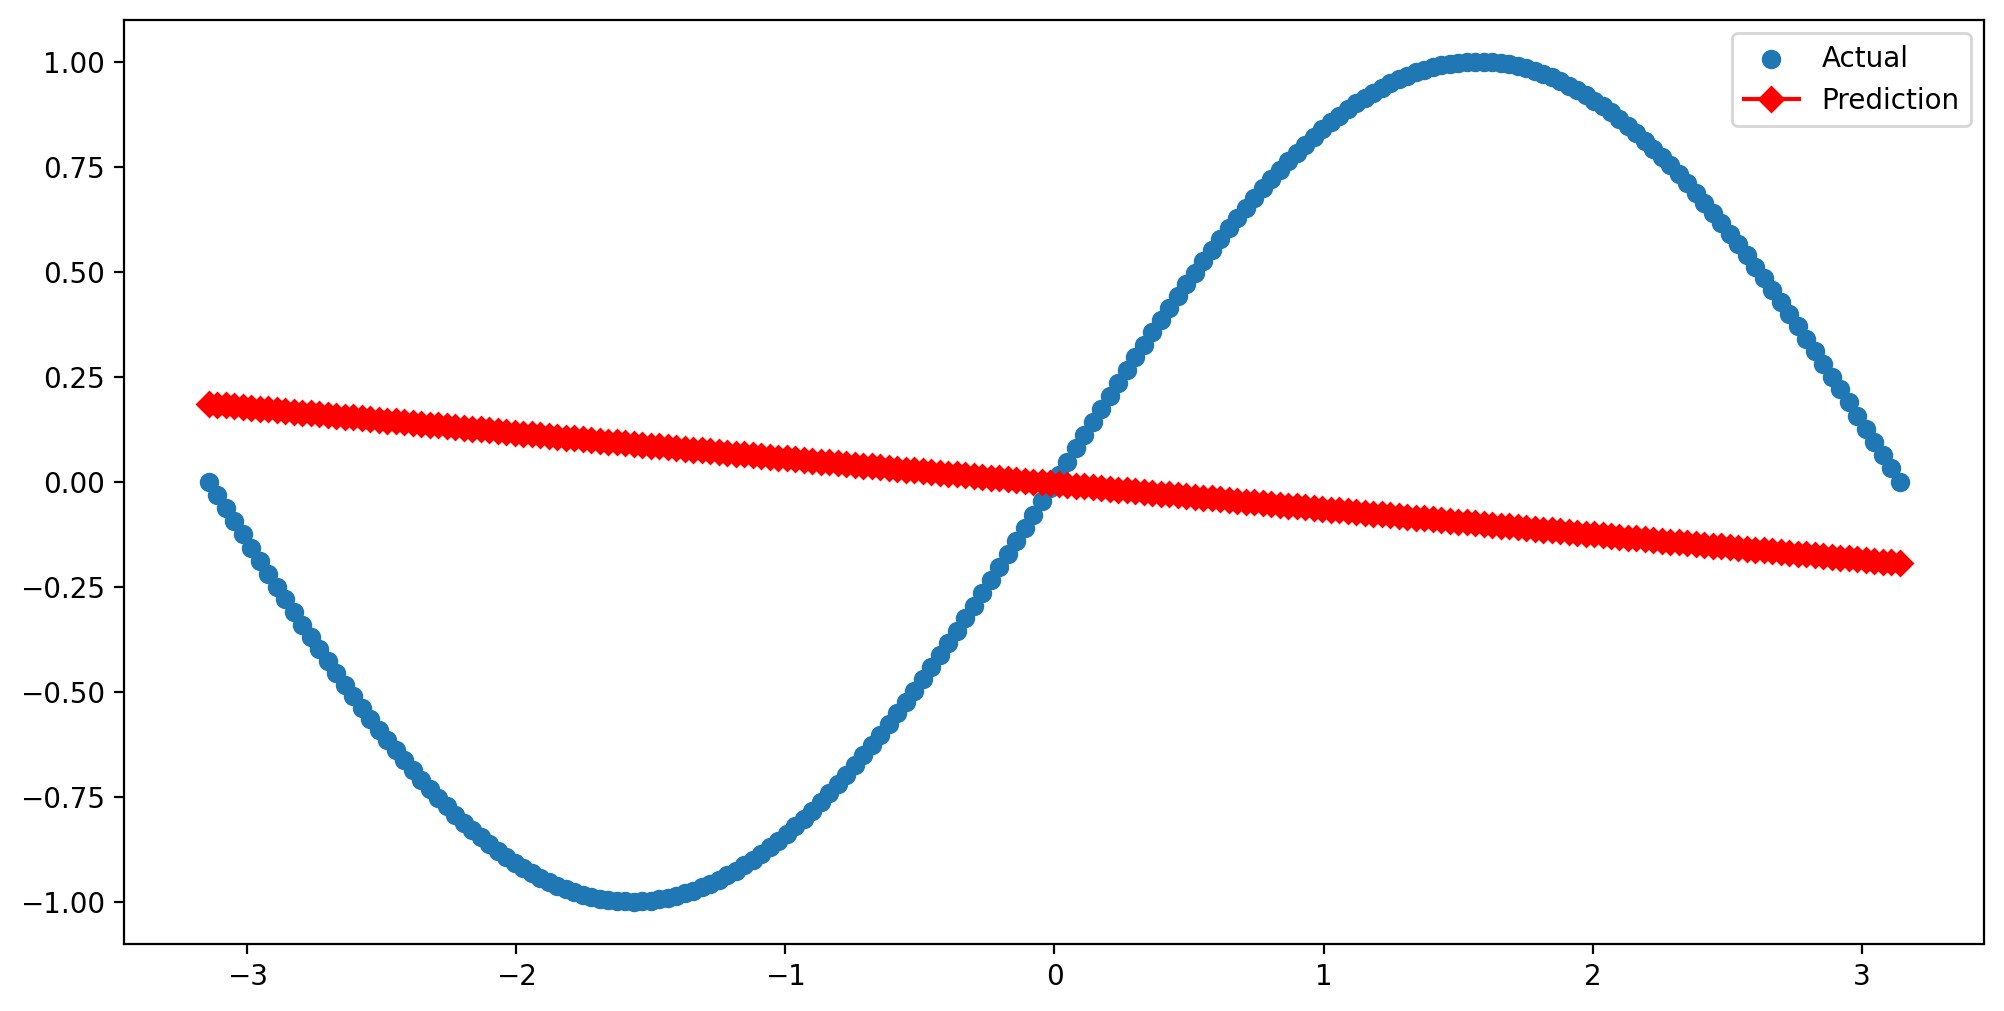

In [23]:
# answer to question 6.3
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Dense(8,input_dim=1))
model.add(Dense(6))
model.add(Dense(5))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)
# Train the model using the X, y as inputs
hist = model.fit(X, y, epochs= 150, verbose=0)

# Make predictions on the test dataset
y_pred=model.predict(X_test)

# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=200)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,y_pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()

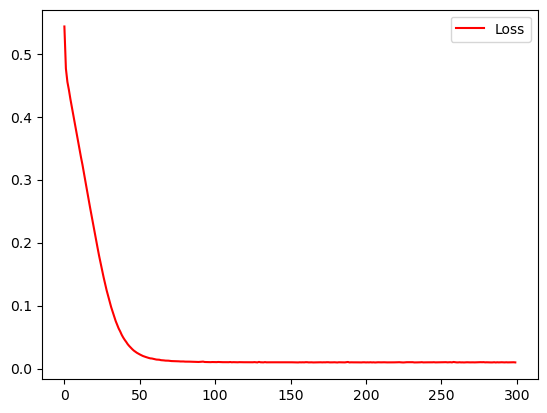

7/7 [==============================] - 0s 667us/step


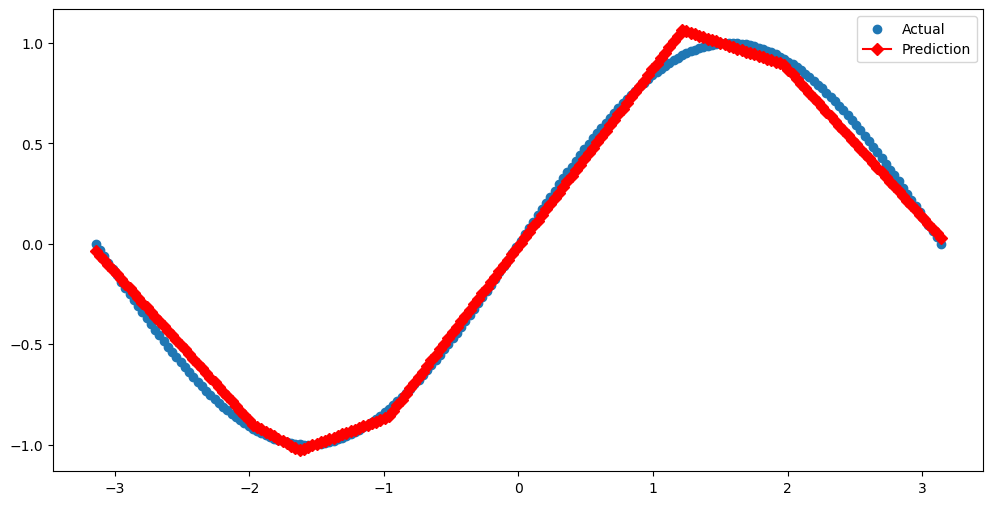

In [24]:
# answer to question 6.5; train for 300 epochs

model = Sequential()
model.add(Dense(7, activation="relu", input_dim=1))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
# Generate 1000 numbers in [-5,5]
X = np.linspace(-5,5,1000)
# Gnerate y as sine X
y = np.sin(X)
# Train the model using the X, y as inputs
hist = model.fit(X,y,epochs=300,verbose=0)
# View the loss through the training process
plt.plot(hist.history["loss"],label='Loss',color="r")
plt.legend()
plt.show()

# Make predictions on the test set
X_test = np.linspace(-np.pi,np.pi,200)
y_test = np.sin(X_test)
pred = model.predict(X_test)
# Compare the actual y value and the prediction
fig = plt.figure(figsize=(12,6), dpi=100)
plt.scatter(X_test,y_test,label='Actual')
plt.plot(X_test,pred,label='Prediction',marker="D",color="r")
plt.legend()
plt.show()